In [37]:
import torchvision.transforms as transforms
import torchvision.models as models
import cv2 as cv2
import torch_dct as dct
import torch
import torch.nn.functional as F
import torch.nn as nn
import os
from torchattacks import FGSM, CW, PGD
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
from utils import *

torch.Size([3, 1080, 1080])


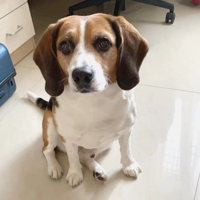

In [38]:
fn = 'imgs/beagle.jpg'
img_tensor = read_img(fn)
show_tensor(img_tensor)

In [39]:
rn50 = models.resnet50(weights="IMAGENET1K_V1")
model = combine_model(rn50, [224,224])
model = model.eval().cuda()

In [40]:
print(predict_1_img(img_tensor,model))

(162, 0.9002524614334106)


In [47]:
adv_img = attack_1_img(model,img_tensor,162, 'PGD', eps=8/255, alpha=1/255, steps=10, random_start=True)

In [42]:
print(predict_1_img(adv_img,model))

(246, 0.9999996423721313)


torch.Size([3, 1080, 1080])


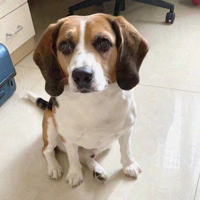

In [48]:
show_tensor(adv_img)

In [50]:
incv3 = models.inception_v3(weights='IMAGENET1K_V1')
model2 = combine_model(incv3, [299,299])
model2 = model2.eval().cuda()

In [51]:
predict_1_img(adv_img,model2)

(162, 0.6519527435302734)